## XGBoost Classifier

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mymldev.model.classifier import XGBClassifier

In [3]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
labels = {0: bc.target_names[0], 1: bc.target_names[1]}

X_df = pd.DataFrame(X, columns=bc.feature_names)
y_df = pd.Series(y, name='target')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, 
                                                    stratify=y_df, random_state=1310)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [5]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

In [6]:
# Top 10 features
xgbc.feature_importance_[:10]

,IDV,Importance
0,worst area,0.138889
1,area error,0.129630
2,worst texture,0.125000
3,mean texture,0.083333
4,mean concave points,0.074074
5,worst concave points,0.067130
6,worst concavity,0.057870
7,worst symmetry,0.057870
8,worst smoothness,0.050926
9,mean smoothness,0.034722


In [7]:
xgbc_train_metric = xgbc.classification_metric(X_train, y_train, labels=labels)
xgbc_test_metric = xgbc.classification_metric(X_test, y_test, labels=labels)

In [8]:
xgbc_test_metric.gains_table_


,Decile,No. of Observations,Number of Targets,Cumulative Targets,% of Targets,Gain,Random Targets,Lift,Cumulative Lift
0,1,15,15,15,16.6667,16.6667,9,1.66667,1.66667
1,2,14,14,29,15.5556,32.2222,9,1.55556,3.22222
2,3,14,14,43,15.5556,47.7778,9,1.55556,4.77778
3,4,14,14,57,15.5556,63.3333,9,1.55556,6.33333
4,5,14,12,69,13.3333,76.6667,9,1.33333,7.66667
5,6,15,15,84,16.6667,93.3333,9,1.66667,9.33333
6,7,14,6,90,6.66667,100,9,0.666667,10
7,8,14,0,90,0,100,9,0,10
8,9,14,0,90,0,100,9,0,10
9,10,15,0,90,0,100,9,0,10


In [9]:
xgbc_test_metric.auc_, xgbc_test_metric.lift_score_


(0.9874213836477987, 1.6666666666666667)

In [10]:
xgbc_test_cfm_metric = xgbc_test_metric.confusion_matrix(0.4)

In [11]:
xgbc_test_metric.cfm

,threshold (0.4),malignant,benign
0,malignant,48,5
1,benign,1,89


In [12]:
print(f'Accuracy: {xgbc_test_cfm_metric.accuracy_}')
print(f'F1-score: {xgbc_test_cfm_metric.f1_score_}')
print(f'False Positives: {xgbc_test_cfm_metric.fp_}')
print(f'False Negatives: {xgbc_test_cfm_metric.fn_}')
print(f'True Positives: {xgbc_test_cfm_metric.tp_}')
print(f'True Negatives: {xgbc_test_cfm_metric.tn_}')
print(f'False Discovery Rate: {xgbc_test_cfm_metric.false_discovery_rate_}')
print(f'False Negative Rate: {xgbc_test_cfm_metric.false_negative_rate_}')
print(f'False Omission Rate: {xgbc_test_cfm_metric.false_omission_rate_}')
print(f'False Positive Rate: {xgbc_test_cfm_metric.false_positive_rate_}')
print(f'Negative Predictive Value: {xgbc_test_cfm_metric.negative_predictive_value_}')
print(f'Precision: {xgbc_test_cfm_metric.precision_}')
print(f'Recall: {xgbc_test_cfm_metric.recall_}')
print(f'Specificity: {xgbc_test_cfm_metric.specificity_}')

Accuracy: 95.8
F1-score: 96.74
False Positives: 5
False Negatives: 1
True Positives: 89
True Negatives: 48
False Discovery Rate: 5.32
False Negative Rate: 1.11
False Omission Rate: 2.04
False Positive Rate: 9.43
Negative Predictive Value: 97.96
Precision: 94.68
Recall: 98.89
Specificity: 90.57


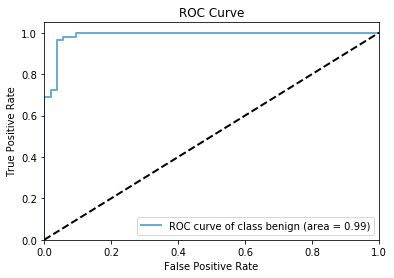

In [13]:
ax = xgbc_test_metric.plot_roc_
plt.show()